## Data Augmentation

Writing a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, creating four shifted copies (one per direction) and adding them to the training set. Finally, training the best model on this expanded training set and measure its accuracy on the test set. We should observe that our model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version =1)

In [3]:
X,y = mnist['data'], mnist['target']

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plotdigit(data):
    digit = data.reshape(28,28)
    plt.imshow(digit, cmap = mpl.cm.binary, interpolation = "nearest")
    plt.axis("off")

In [5]:
from scipy.ndimage.interpolation import shift

In [6]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

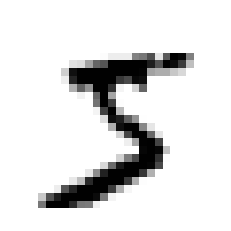

In [7]:
def shiftdigit(digit_array, dx, dy, new= 0):
    return shift(digit_array.reshape(28,28), [dx, dy], cval = new).reshape(784)

plotdigit(shiftdigit(X[0], 1,0))

In [8]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]

for dx, dy in ((1,0),(-1,0),(0,1),(0,-1)):
    shifted_images = np.apply_along_axis(shiftdigit, axis = 1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)
    
X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn_clf = KNeighborsClassifier(weights = 'distance', n_neighbors = 4)

In [11]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [12]:
y_pred_expanded = knn_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, y_pred_expanded)

0.9763

We got an accuracy of 97.83% which is better than that of when we fitted the classifier on the training set without data augmentation process.